In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Data Cleaning

In [5]:
def data_cleaning(df):
    # Renaming the Columns 
    df = df.rename(columns = {'cp':'chest_pain_type',
                    'trestbps':'bp_at_admission',
                    'chol':'cholestoral','fbs':'fasting_blood_sugar',
                    'restecg':'ecg_results','thalach':'max_heart_rate',
                    'exang':'chest_pain_during_excercise',
                    'oldpeak':'st_depression','slope':'slope_of_st',
                    'ca':'no_of_major_vessels','thal':'thallium_test',
                    'condition':'heart_disease_status'})
    
    # Created a new column called age group to cluster the values
    df['age_group'] = np.where(df['age'] <= 50,'Middle Aged',
             np.where(df['age'] <= 70,'Seniors','Old'))
                      
    # Renaming the values of each column for better understanding
    df['sex'] = df['sex'].astype('str').replace({'1':'male','0':'female'})
    df['chest_pain_type'] = df['chest_pain_type'].astype('str').replace({'0':'heart related','1':'unusual pattern',
                                                                         '2':'not related to heart','3':'no chest pain'})
    df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('str').replace({'1':'possible diabetes','0':'no diabetes'})
    df['ecg_results'] = df['ecg_results'].astype('str').replace({'0':'normal','1':'possible risk','2':'high risk'})
    df['chest_pain_during_excercise'] = df['chest_pain_during_excercise'].astype('str').replace({'1':'yes','0':'no'})
    df['slope_of_st'] = df['slope_of_st'].astype('str').replace({'0':'normal','1':'not good','2':'concerning'})
    df['thallium_test'] = df['thallium_test'].astype('str').replace({'0':'no defect','1':'irreversible defect','2':'reversible defect'})
    df['heart_disease_status'] = df['heart_disease_status'].astype('str').replace({'0':'no','1':'yes'})
    
    # Rearranging the Columns
    df = df[['heart_disease_status','age', 'age_group', 'sex', 'chest_pain_type', 'bp_at_admission', 'cholestoral',
           'fasting_blood_sugar', 'ecg_results', 'max_heart_rate',
           'chest_pain_during_excercise', 'st_depression', 'slope_of_st',
           'no_of_major_vessels', 'thallium_test', ]]

    return df

df = data_cleaning(df)

# Data Understanding 

In [6]:
def data_understanding(df):
        print(f"{'*' * 50} Data Information {'*' * 68}")
        display(df.info())
        print(f"\n{'*' * 50} Checking For Duplicate Values {'*' * 55}")
        display(df.duplicated().sum())
        print(f"\n{'*' * 50} Description of Numerical Columns {'*' * 52}")
        display(df.describe())
        print(f"\n{'*' * 50} Description of Categorical Columns {'*' * 50}")
        display(df.describe(include = 'object'))
        print(f"\n{'*' * 50} DataFrame Summary {'*' * 50}")
        display(df.head())
    
data_understanding(df)

************************************************** Data Information ********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   heart_disease_status         297 non-null    object 
 1   age                          297 non-null    int64  
 2   age_group                    297 non-null    object 
 3   sex                          297 non-null    object 
 4   chest_pain_type              297 non-null    object 
 5   bp_at_admission              297 non-null    int64  
 6   cholestoral                  297 non-null    int64  
 7   fasting_blood_sugar          297 non-null    object 
 8   ecg_results                  297 non-null    object 
 9   max_heart_rate               297 non-null    int64  
 10  chest_pain_during_excercise  297 non-null    object 
 11 

None


************************************************** Checking For Duplicate Values *******************************************************


np.int64(0)


************************************************** Description of Numerical Columns ****************************************************


,age,bp_at_admission,cholestoral,max_heart_rate,st_depression,no_of_major_vessels
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000



************************************************** Description of Categorical Columns **************************************************


,heart_disease_status,age_group,sex,chest_pain_type,fasting_blood_sugar,ecg_results,chest_pain_during_excercise,slope_of_st,thallium_test
count,297,297,297,297,297,297,297,297,297
unique,2,3,2,4,2,3,2,3,3
top,no,Seniors,male,no chest pain,no diabetes,normal,no,normal,no defect
freq,160,199,201,142,254,147,200,139,164



************************************************** DataFrame Summary **************************************************


,heart_disease_status,age,age_group,sex,chest_pain_type,bp_at_admission,cholestoral,fasting_blood_sugar,ecg_results,max_heart_rate,chest_pain_during_excercise,st_depression,slope_of_st,no_of_major_vessels,thallium_test
0,no,69,Seniors,male,heart related,160,234,possible diabetes,high risk,131,no,0.1,not good,1,no defect
1,no,69,Seniors,female,heart related,140,239,no diabetes,normal,151,no,1.8,normal,2,no defect
2,no,66,Seniors,female,heart related,150,226,no diabetes,normal,114,no,2.6,concerning,0,no defect
3,yes,65,Seniors,male,heart related,138,282,possible diabetes,high risk,174,no,1.4,not good,1,no defect
4,no,64,Seniors,male,heart related,110,211,no diabetes,high risk,144,yes,1.8,not good,0,no defect


# Data Visualization

In [7]:
# Created seprate Dataframe for Heart Disease Status
heart_disease = df[df['heart_disease_status'] == 'yes']
no_disease = df[df['heart_disease_status'] == 'no']

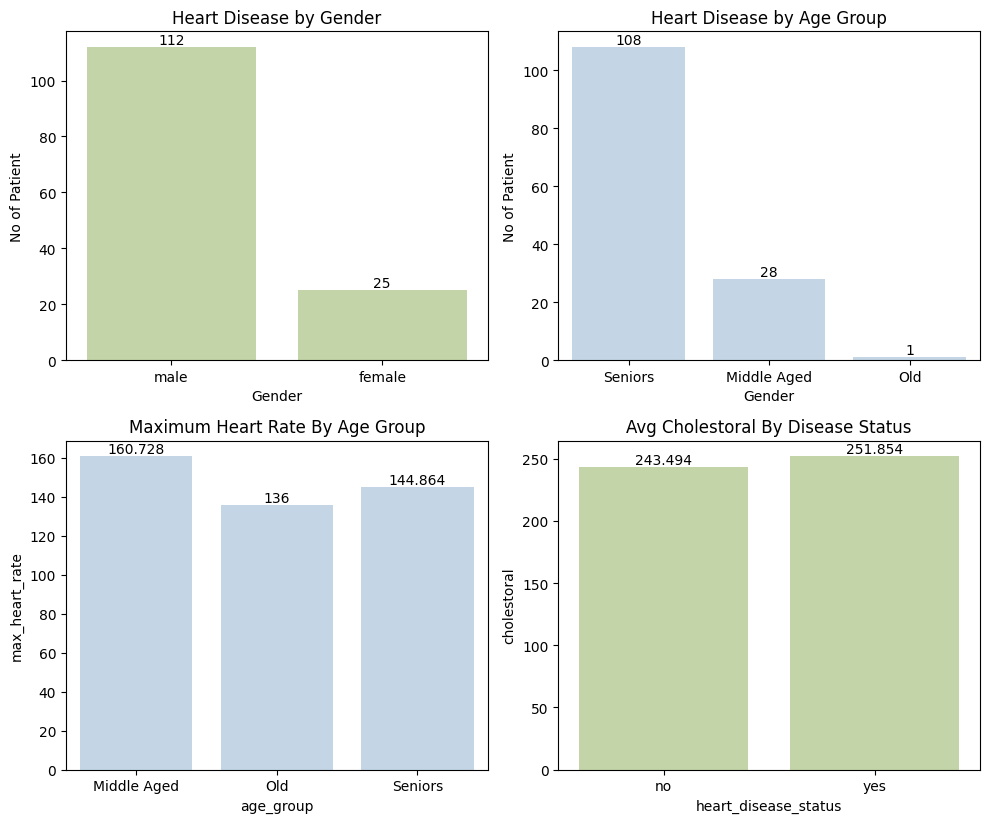

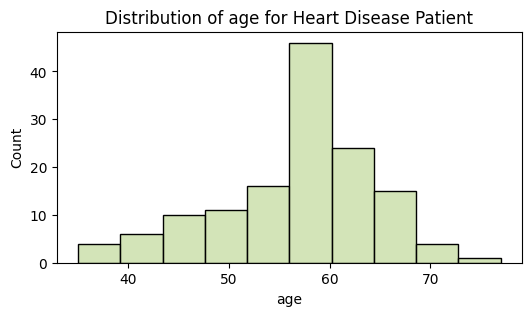

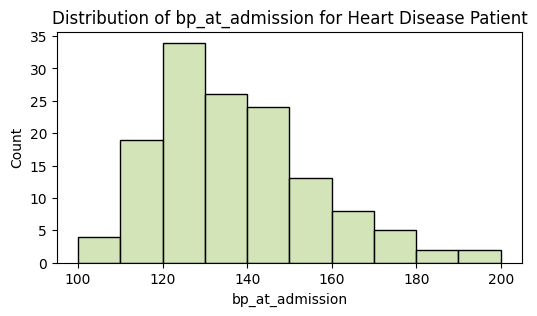

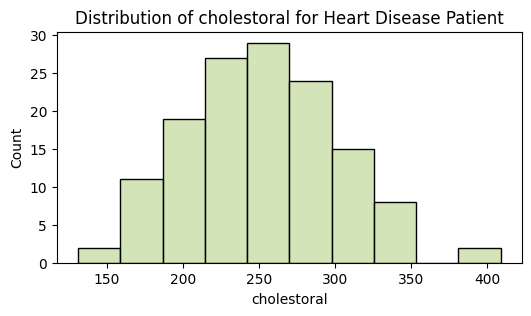

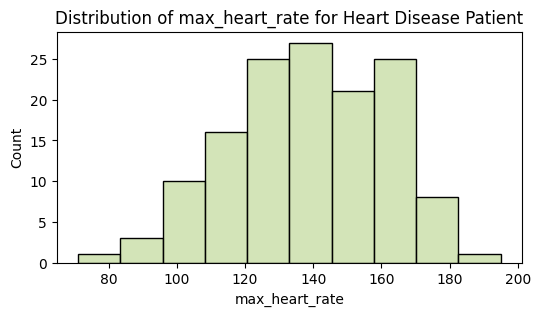

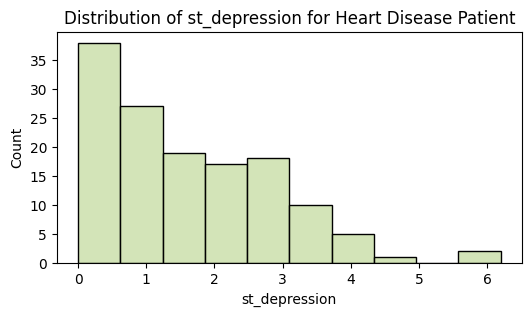

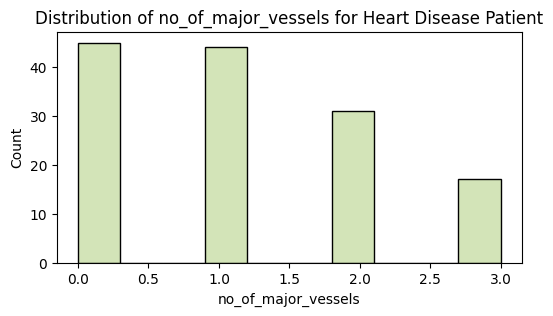

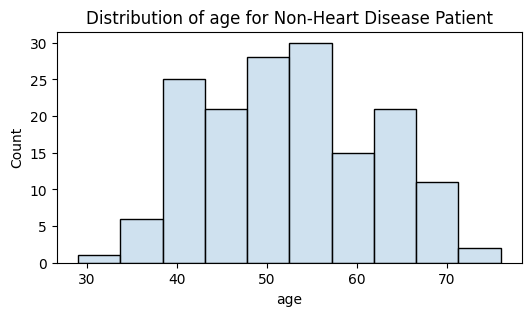

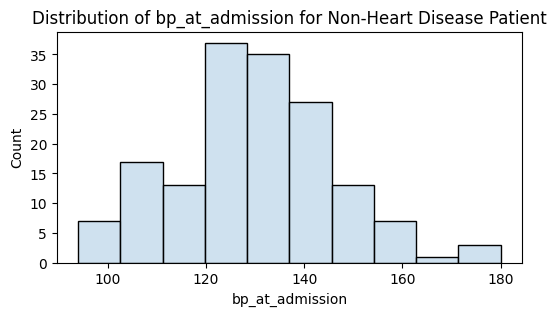

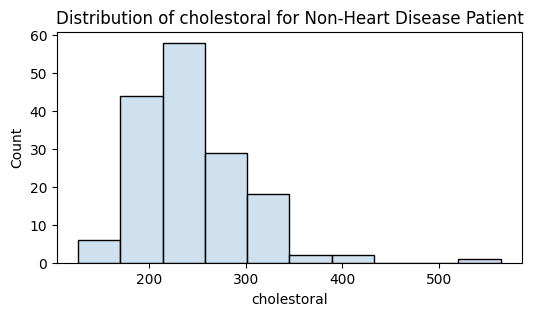

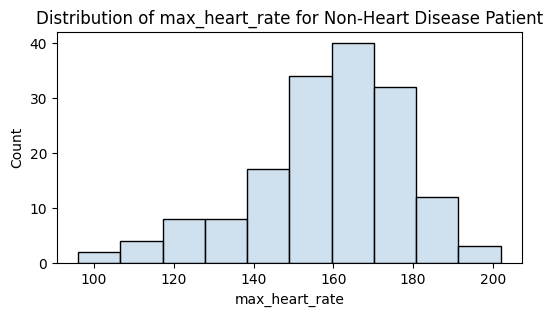

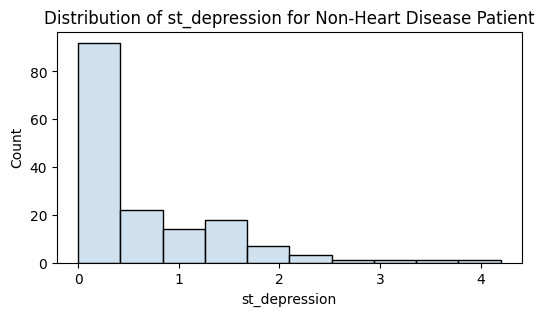

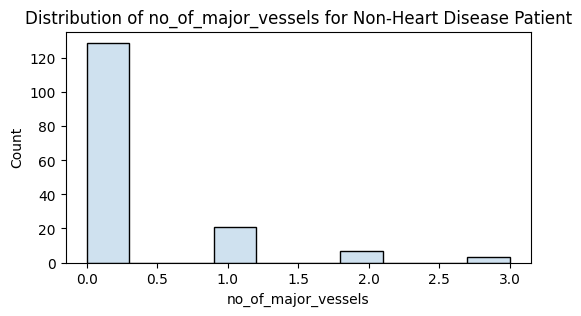

In [8]:
plt.figure(figsize = (10,12))
plt.subplot(3,2,1)
ax = sns.countplot(x = heart_disease['sex'],color='#C5DCA0')
plt.title('Heart Disease by Gender')
ax.bar_label(ax.containers[0])
plt.xlabel('Gender')
plt.ylabel('No of Patient')

plt.subplot(3,2,2)
ax = sns.countplot(x = heart_disease['age_group'],color= '#BFD7EA')
plt.title('Heart Disease by Age Group')
ax.bar_label(ax.containers[0])
plt.xlabel('Gender')
plt.ylabel('No of Patient')

plt.subplot(3,2,3)
x = df.groupby('age_group',as_index = False)['max_heart_rate'].mean()
ax = sns.barplot(x = 'age_group',y = 'max_heart_rate', data = x,color= '#BFD7EA')
plt.title('Maximum Heart Rate By Age Group')
ax.bar_label(ax.containers[0])

plt.subplot(3,2,4)
x = df.groupby('heart_disease_status',as_index = False)['cholestoral'].mean()
ax = sns.barplot(x = 'heart_disease_status',y = 'cholestoral', data = x,color='#C5DCA0')
ax.bar_label(ax.containers[0])
plt.title('Avg Cholestoral By Disease Status')

plt.tight_layout()
plt.show()

# Histogram 
col = heart_disease.select_dtypes(include = 'number')
for i in col.columns:
    plt.figure(figsize = (6,3))
    sns.histplot(col[i], bins = 10,color='#C5DCA0')
    plt.title(f'Distribution of {i} for Heart Disease Patient')
    plt.show()

#Histogram
col = no_disease.select_dtypes(include = 'number')
for i in col.columns:
    plt.figure(figsize = (6,3))
    sns.histplot(col[i], bins = 10,color= '#BFD7EA')
    plt.title(f'Distribution of {i} for Non-Heart Disease Patient')
    plt.show()

In [9]:
# Checking if there is any difference in cholestral level of heart disease patient and non-heart disease patient.
# I performed two sample t test to find is there any significant different at alpha 0.05.

# Hypothesis
# -> Ho: Both groups are same
# -> Ha: Non_heart < Heart


heart = heart_disease['cholestoral']
non_heart = no_disease['cholestoral']

t_statistics, p_value = stats.ttest_ind(heart,non_heart,alternative = 'greater')

print(f'T-Statistics: {t_statistics}')
print(f'P-Value: {p_value}')
if p_value < 0.05:
    print('We have Strong evidence against the Null Hypothesis. Reject the Null Hypothesis.\nThe groups are statisticaly different.')
else:
    print('We have weak evidence against the Null Hypothesis. Failed to rejet the Null Hypothesis.\nThe groups are not statisticaly different.')

T-Statistics: 1.3834015443480652
P-Value: 0.08379388357371184
We have weak evidence against the Null Hypothesis. Failed to rejet the Null Hypothesis.
The groups are not statisticaly different.


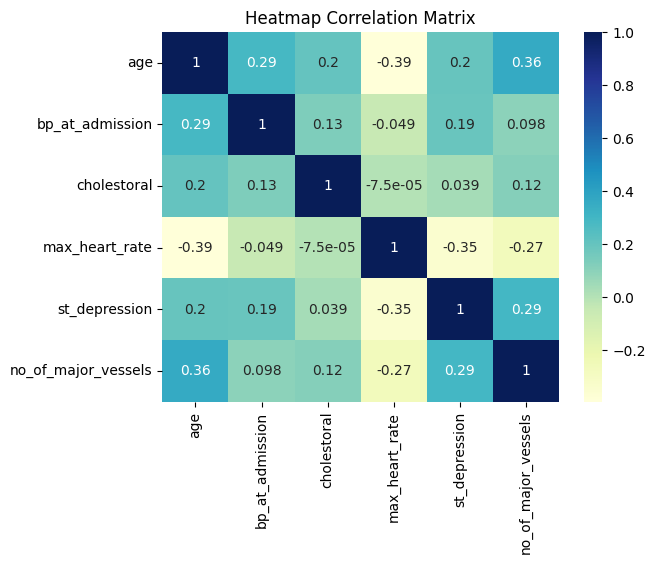

In [10]:
sns.heatmap(df.corr(numeric_only = True),annot=True, cmap='YlGnBu')
plt.title('Heatmap Correlation Matrix')
plt.show()

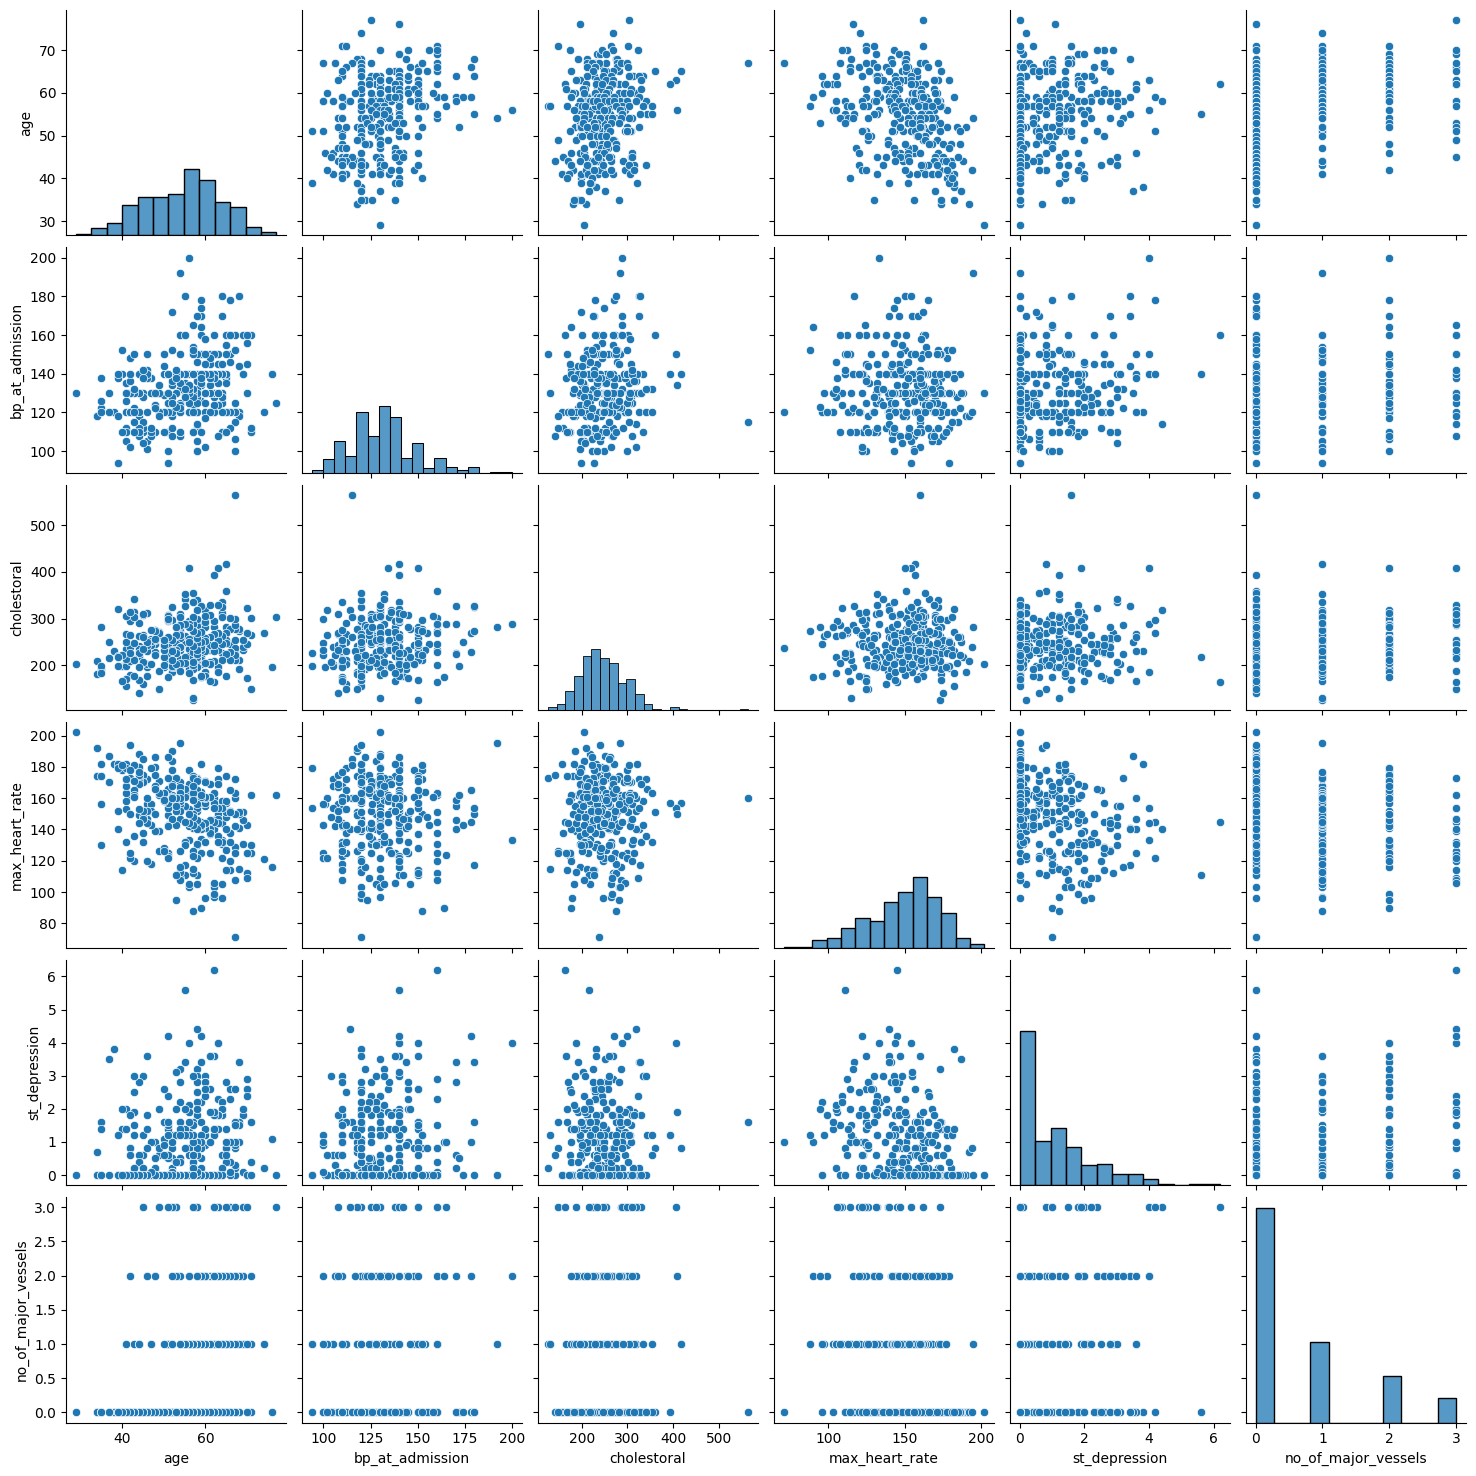

In [11]:
# Correlation Matrix 
sns.pairplot(df.select_dtypes(include = 'number'))
plt.show()